# Principal Component Analysis(PCA) by Shromana Majumder(1.04.24)

## Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features (or dimensions) in a dataset while retaining as much information as possible.

## Several techniques

1. principal component analysis (PCA), 
2. singular value decomposition (SVD),
3. linear discriminant analysis (LDA).

### What is PCA?

Principal component analysis (PCA) is a dimensionality reduction and unsupervised machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends.

This method was introduced by Karl Pearson. It works on the condition that while the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum.

Principal component analysis is used to extract the important information from a multivariate data table and to express this information as a set of few new variables called principal components. These new variables correspond to a linear combination of the originals. The number of principal components is less than or equal to the number of original variables.

### Goal

The goal of PCA is to identify directions (or principal components) along which the variation in the data is maximal.

## What Are Principal Components?

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

* Principal components represent the directions of the data that explain a maximal amount of variance

#### Importing Libraries

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import cycle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
sns.set()
from sklearn.metrics import confusion_matrix
import os

## Load the Iris Flower Dataset

In [326]:
df = pd.read_csv("IRIS.csv")

In [327]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


* One target variable with 3 possible values, one for each species of Iris.

## Univariate EDA

In [246]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [247]:
#Statistical Description
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Featues and target

In [248]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

* Four features, petal length and width, and sepal length and width.

## Label encoding

In [297]:
df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [250]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Missing Values

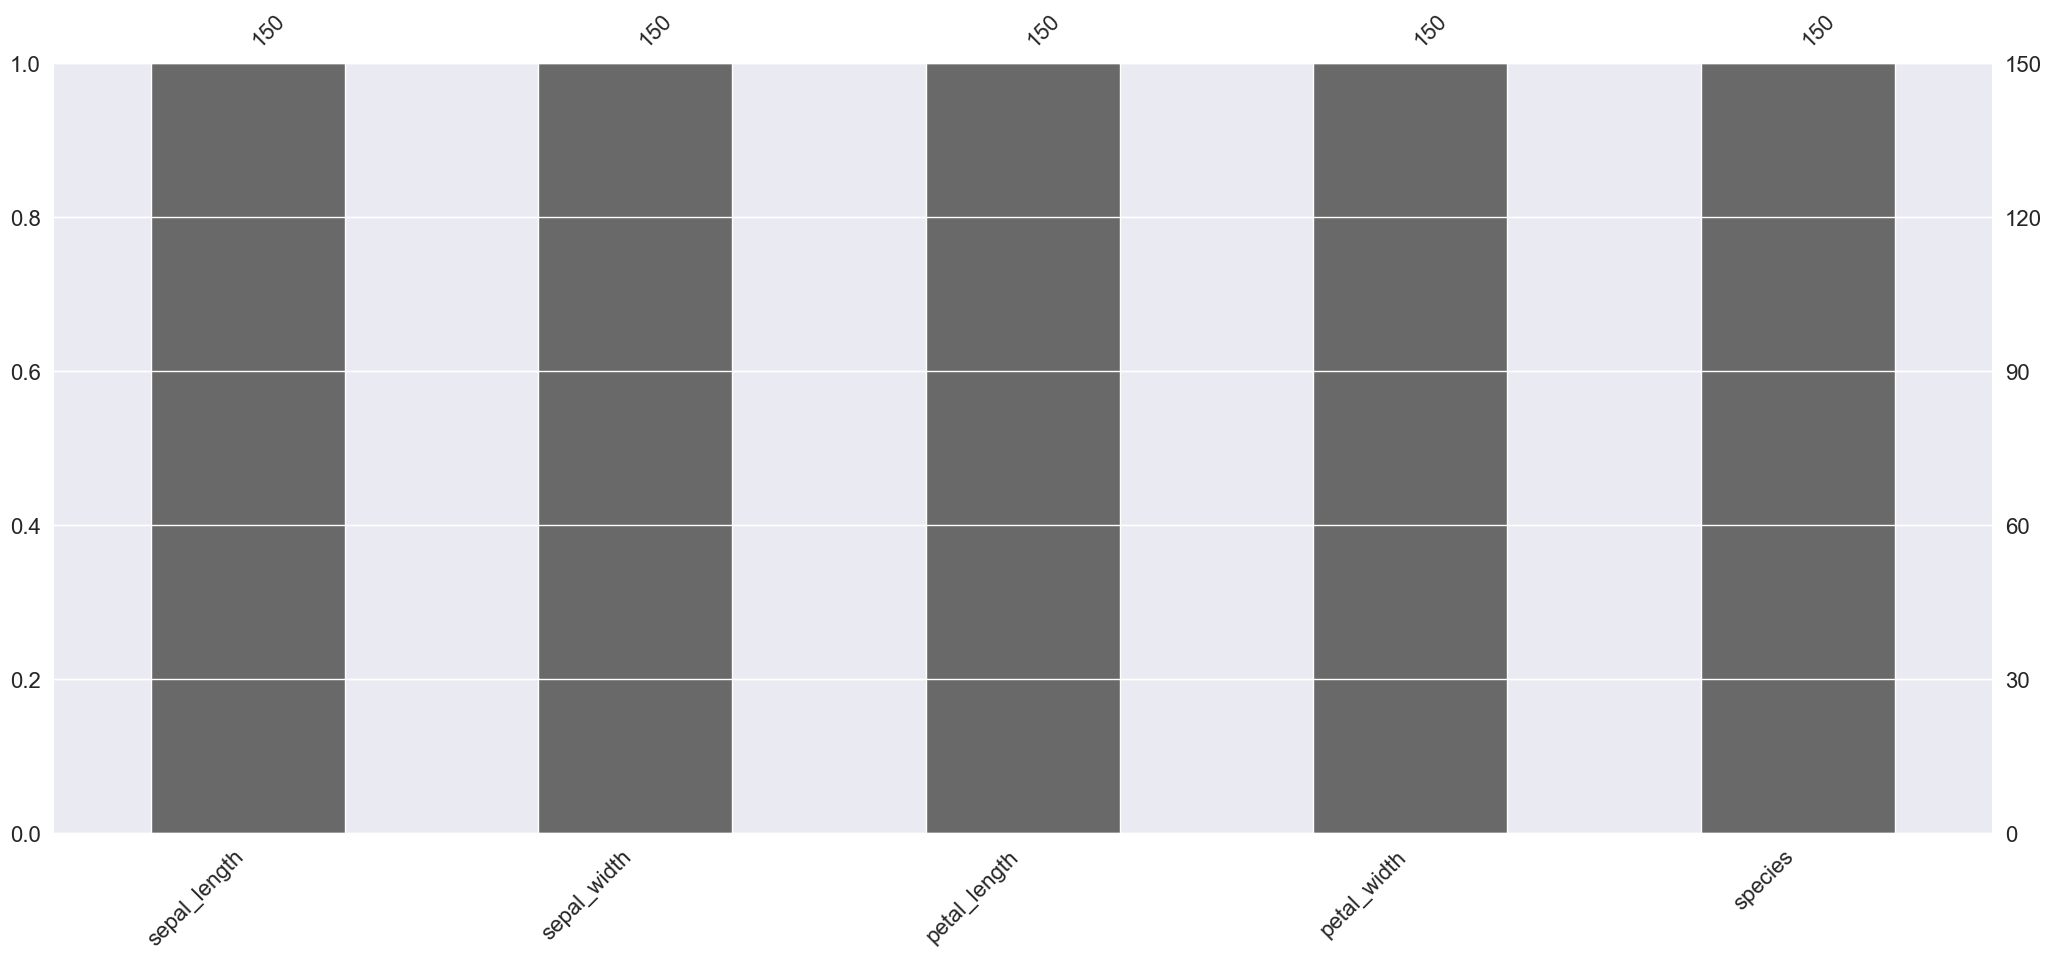

In [251]:
p=msno.bar(df)

### Count of each class

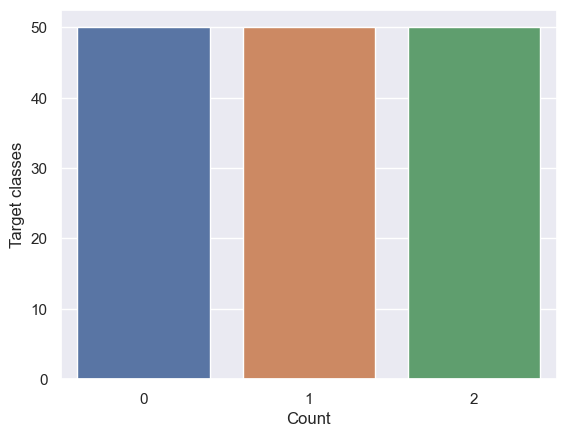

In [252]:
sns.countplot(x=df.species ,data=df)
plt.xlabel("Count")
plt.ylabel("Target classes")
plt.show()

* Balanced dataset

## Bivariate EDA

### Sepal width and Petal length

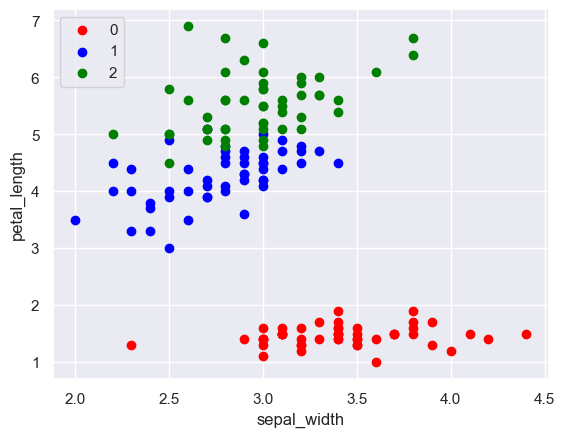

In [253]:
fig = plt.figure()
x_index = 1
y_index = 2
ax = fig.add_subplot(111)

colors = ['red', 'blue', 'green']

for label, color in zip(df['species'].unique(), colors):
    mask = (df['species'] == label)
    plt.scatter(df[mask][df.columns[x_index]], df[mask][df.columns[y_index]], color=color, label=label)

plt.xlabel(df.columns[x_index])
plt.ylabel(df.columns[y_index])
plt.legend(loc='upper left')
plt.show()


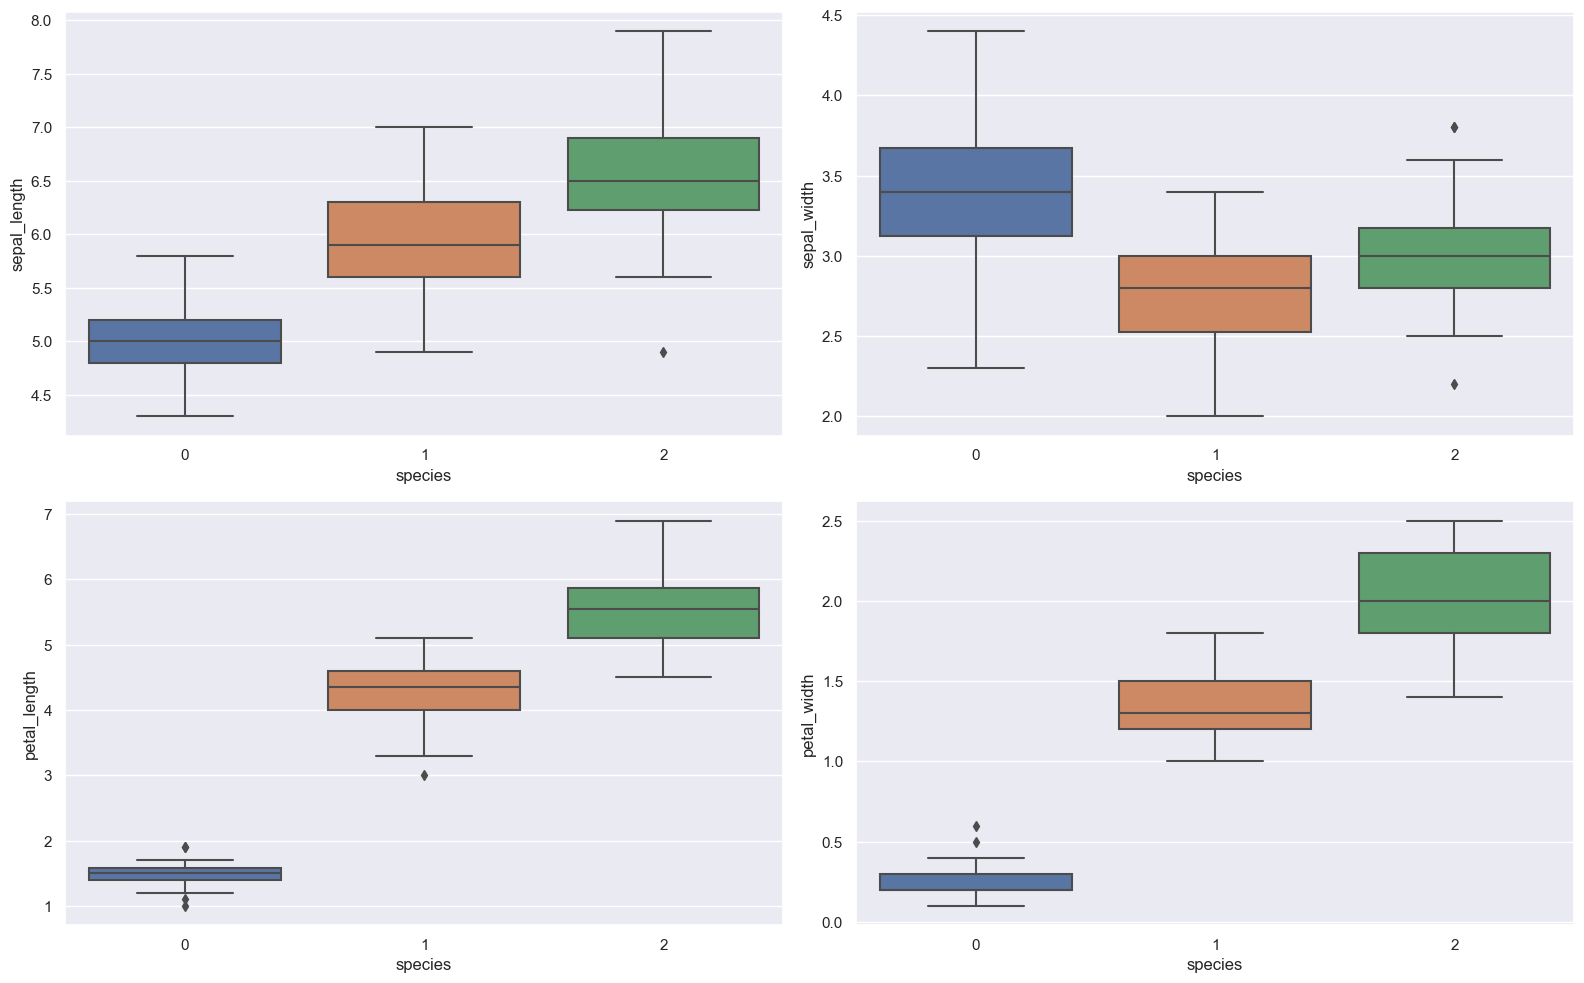

In [254]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['species'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()

plt.show()

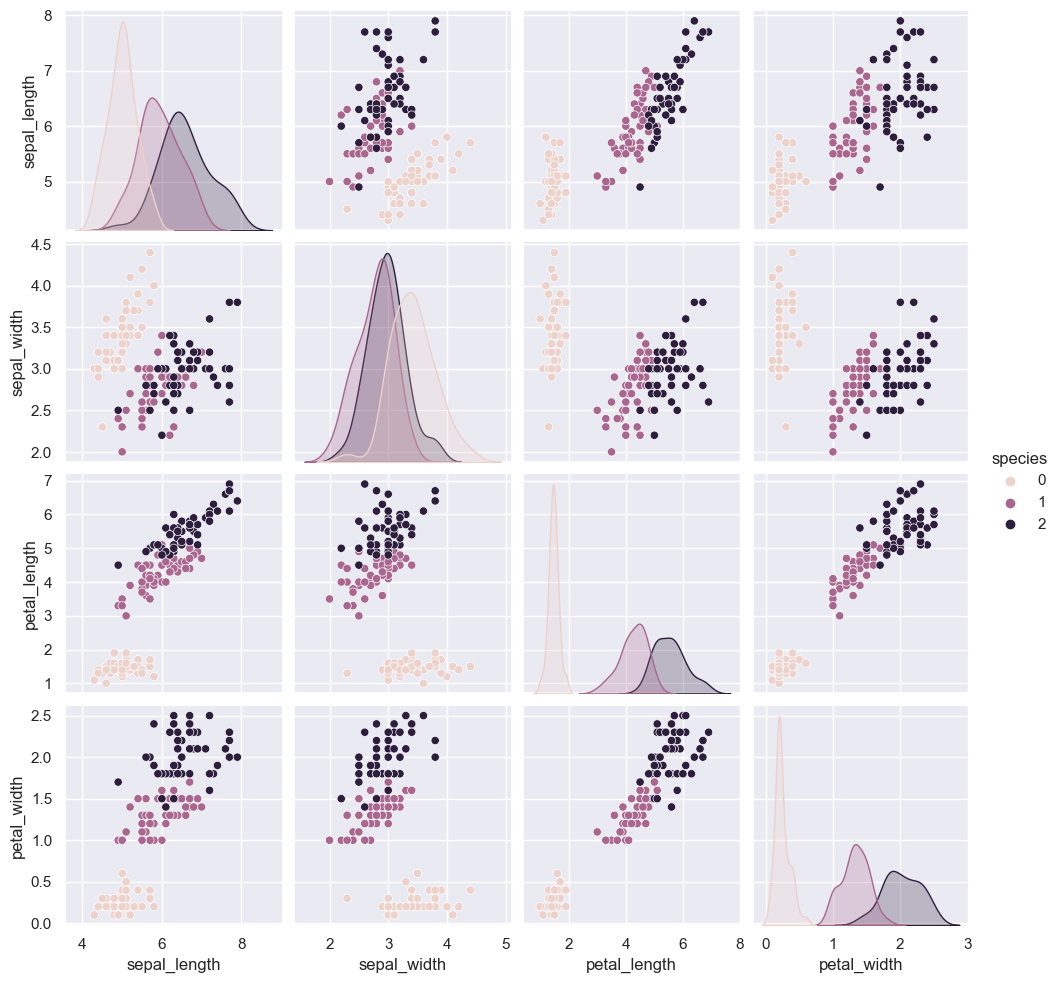

In [255]:
sns.pairplot(df, hue = 'species')

* Both the sepal features and the petal features independently contain explanatory information relating to the type of Iris, i.e. the target class.

### Distribution Plot

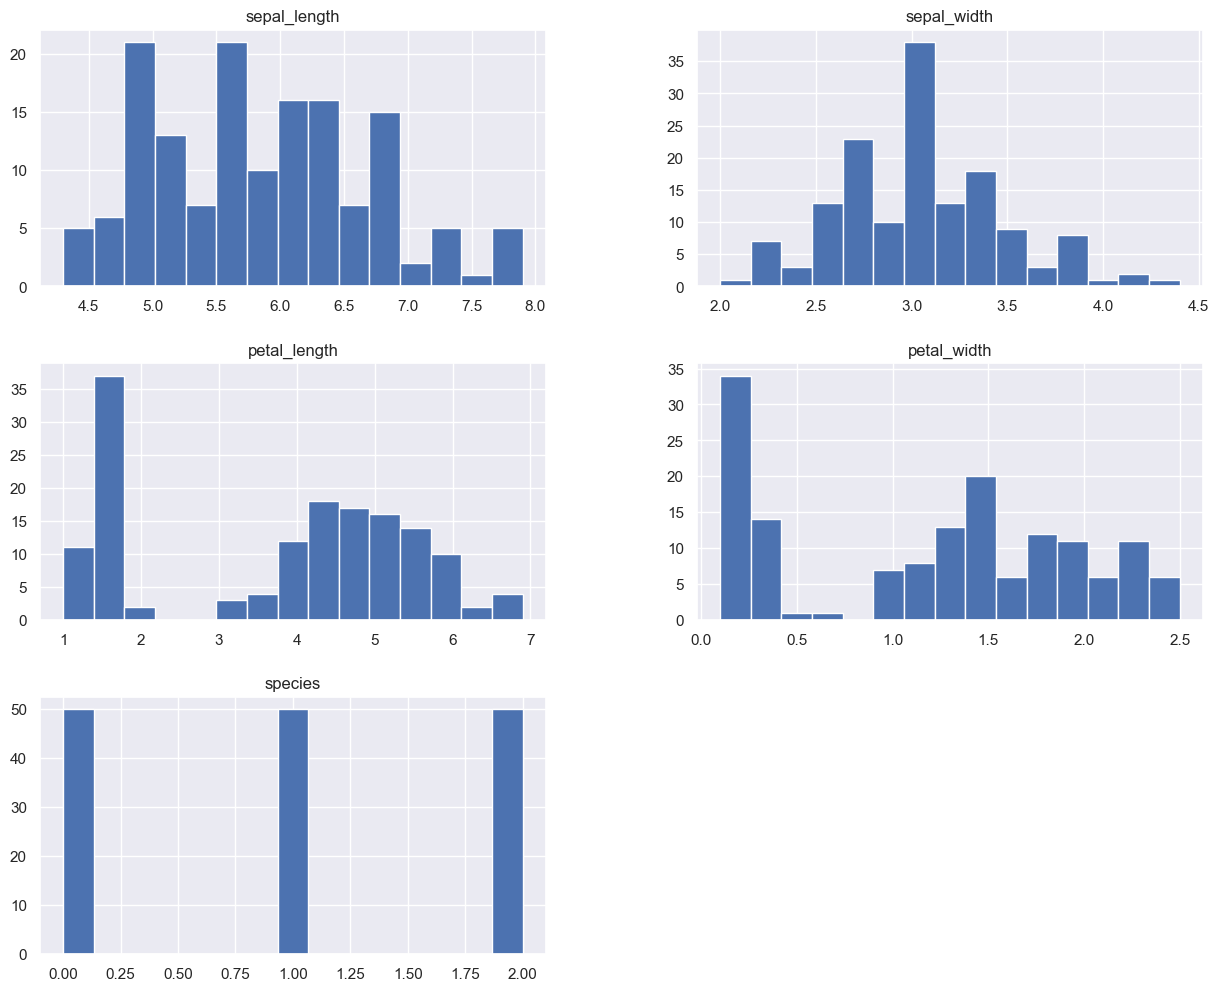

In [256]:
df.hist(figsize=(15,12),bins = 15)
plt.show()

## Modelling

# PCA Principal Component Analysis without sklearn



### Separating Target

In [257]:
X = df.drop(['species'],axis=1)
y = df.species

## Scaling

In [258]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

## Train-Test Splitting

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [260]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

## Model Evaluation

In [261]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score without PCA",knn.score(X_train,y_train),"%")
print("Test score without PCA",knn.score(X_test,y_test),"%")

Train score without PCA 0.9714285714285714 %
Test score without PCA 0.9777777777777777 %


# PCA Principal Component Analysis without sklearn



## Step-by-Step Explanation of PCA

## Step 1: Standardize the data without Scikit Learn

 If there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (for example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

In [262]:
X = df.drop(['species'],axis=1)
y = df.species

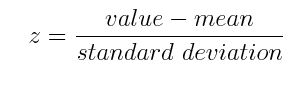

In [263]:
# Mean
X_mean = X.mean()
 
# Standard deviation
X_std = X.std()
 
# Standardization
X_standardized = (X - X_mean) / X_std

## Step 2: Covariance matrix

The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. 

The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. 

* If positive then: the two variables increase or decrease together (correlated)
* If negative then: one increases when the other decreases (Inversely correlated)

In [264]:
X_corr=X_standardized.corr()

Text(0.5, 1.0, 'Correlation matrix')

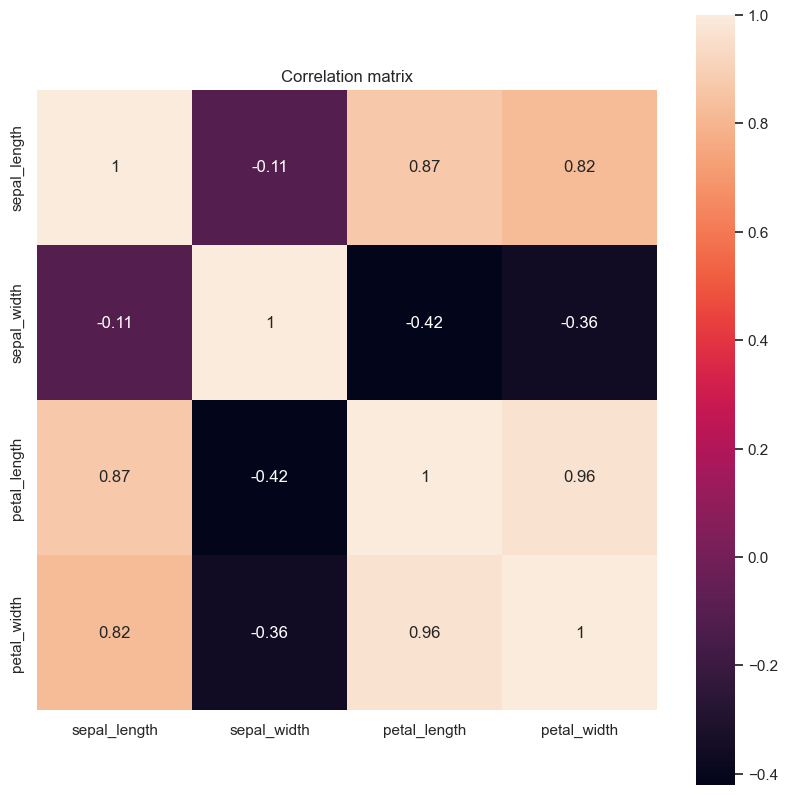

In [265]:
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

* Sepal length is highly correlated with petal length and petal width
* petal length is highly correlated with petal width

## Step 3: Extract the Eign values and their respective Eigen vectors.

The eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most information) and that are called Principal Components.

Eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

In [266]:
u,s,v = np.linalg.svd(X_standardized,full_matrices=False)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([20.82575075, 11.71588318,  4.68568442,  1.75229803]),
 array([[-1.08374515e-01, -4.30198387e-02,  2.59377669e-02,
          1.31235003e-02],
        [-9.98503796e-02,  5.57547718e-02,  4.83370288e-02,
          5.87021386e-02],
        [-1.13323362e-01,  2.70926177e-02, -1.09498919e-02,
          1.58262571e-02],
        [-1.10272311e-01,  4.89460849e-02, -2.10279545e-02,
         -3.77162180e-02],
        [-1.14320085e-01, -5.74019389e-02, -4.55777672e-03,
         -2.12705946e-02],
        [-9.90899920e-02, -1.29181748e-01, -6.52664662e-03,
          2.50190765e-03],
        [-1.17044776e-01, -6.34298891e-03, -7.27866069e-02,
         -2.16683266e-02],
        [-1.06905306e-01, -2.10643251e-02,  1.75638708e-02,
         -1.45066664e-02],
        [-1.12079421e-01,  9.31632514e-02, -3.26632471e-02,
         -1.52396262e-02],
        [-1.04743785e-01,  3.81645251e-02,  5.24440532e-02,
         -2.26982260e-02],
        [-1.03538302e-01, -9.10747351e-02,  5.61556962e-02,
        

In [267]:
eigenvalues, eigenvectors = np.linalg.eig(X_corr)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [2.91081808 0.92122093 0.14735328 0.02060771]
Eigen values Shape: (4,)
Eigen Vector Shape: (4, 4)


In [268]:
np.sum(eigenvalues)

3.999999999999997

 * The sum of the eigen values is equal to number of variables.

### Sort the eigenvalues in descending order and sort the corresponding eigenvectors accordingly.

In [269]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]
 
# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]
 
# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

##  Plotting the variance explained by each PC

* Explained variance is the term that gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space

Text(0.5, 0, 'Dimensions')

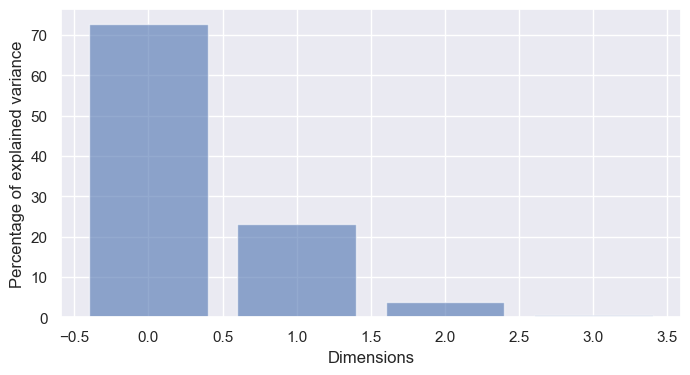

In [270]:
explained_variance=  (eigenvalues / np.sum(eigenvalues))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [271]:
explained_variance

array([72.77045209, 23.03052327,  3.68383196,  0.51519268])

* The first two dimensions will be enough to represent the data.

In [272]:
n_components = 2

### Step 4: Choosing components and forming a feature vector

 Feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep.

In [273]:
feature_vector = eigenvectors[:, :2]

In [274]:
feature_vector

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

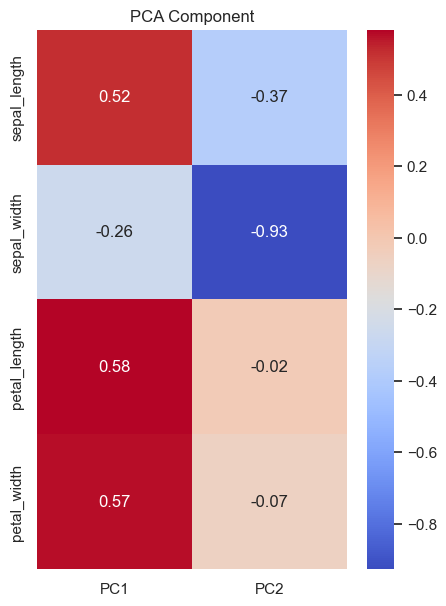

In [275]:
u = eigenvectors[:,:2]
pca_component = pd.DataFrame(u,
                             index=X.columns,
                             columns=['PC1', 'PC2']  
                            )

# Plotting heatmap
plt.figure(figsize=(5, 7))
sns.heatmap(pca_component, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('PCA Component')
plt.show()

### STEP 5: Recast the data along the principal components axis

To use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components 

In [276]:
pca_component

,PC1,PC2
sepal_length,0.522372,-0.372318
sepal_width,-0.263355,-0.925556
petal_length,0.581254,-0.021095
petal_width,0.565611,-0.065416


In [277]:
# Matrix multiplication or dot Product
Z_pca = X_standardized @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

         PCA1      PCA2
0   -2.256981 -0.504015
1   -2.079459  0.653216
2   -2.360044  0.317414
3   -2.296504  0.573447
4   -2.380802 -0.672514
..        ...       ...
145  1.864277 -0.381544
146  1.553288  0.902291
147  1.515767 -0.265904
148  1.371796 -1.012968
149  0.956096  0.022210

[150 rows x 2 columns]


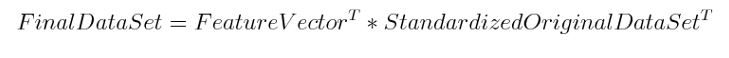

# Dimension is reduced to 150 * 2

## Scatter Plot

In [278]:
# calculating  new axis
pc1 =  X_standardized.dot(eigenvectors[:,0])
pc2 =  X_standardized.dot(eigenvectors[:,1])

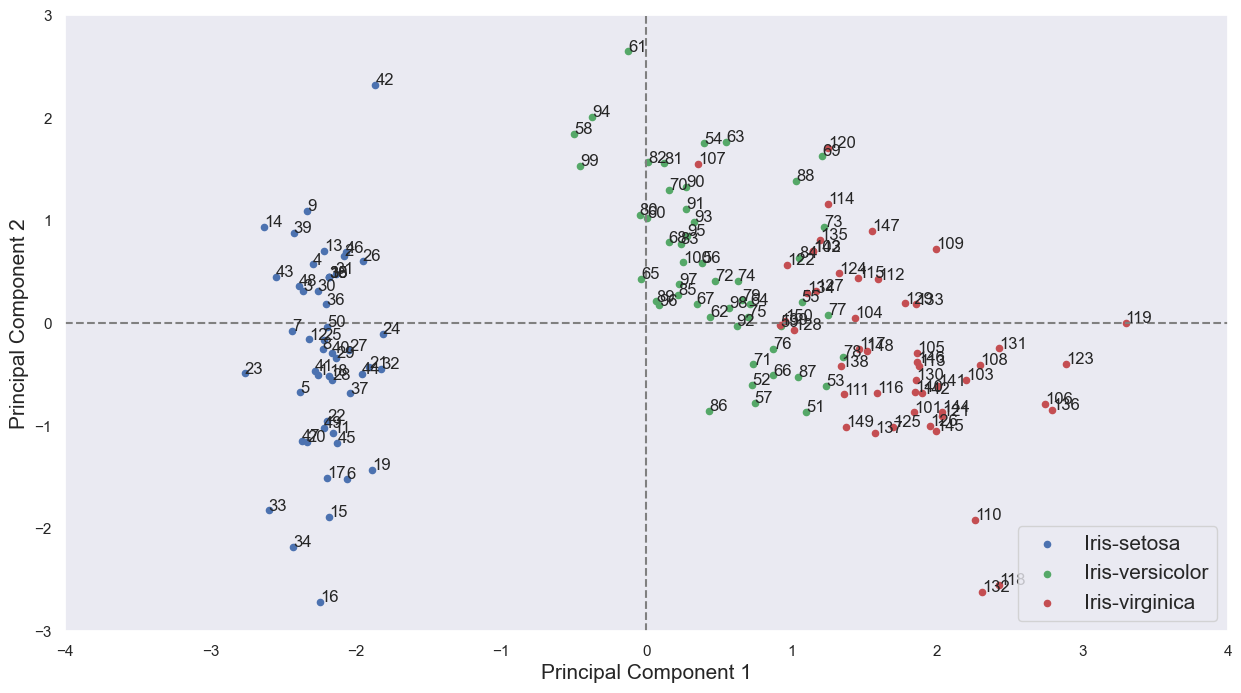

In [279]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)

## Correlation circle

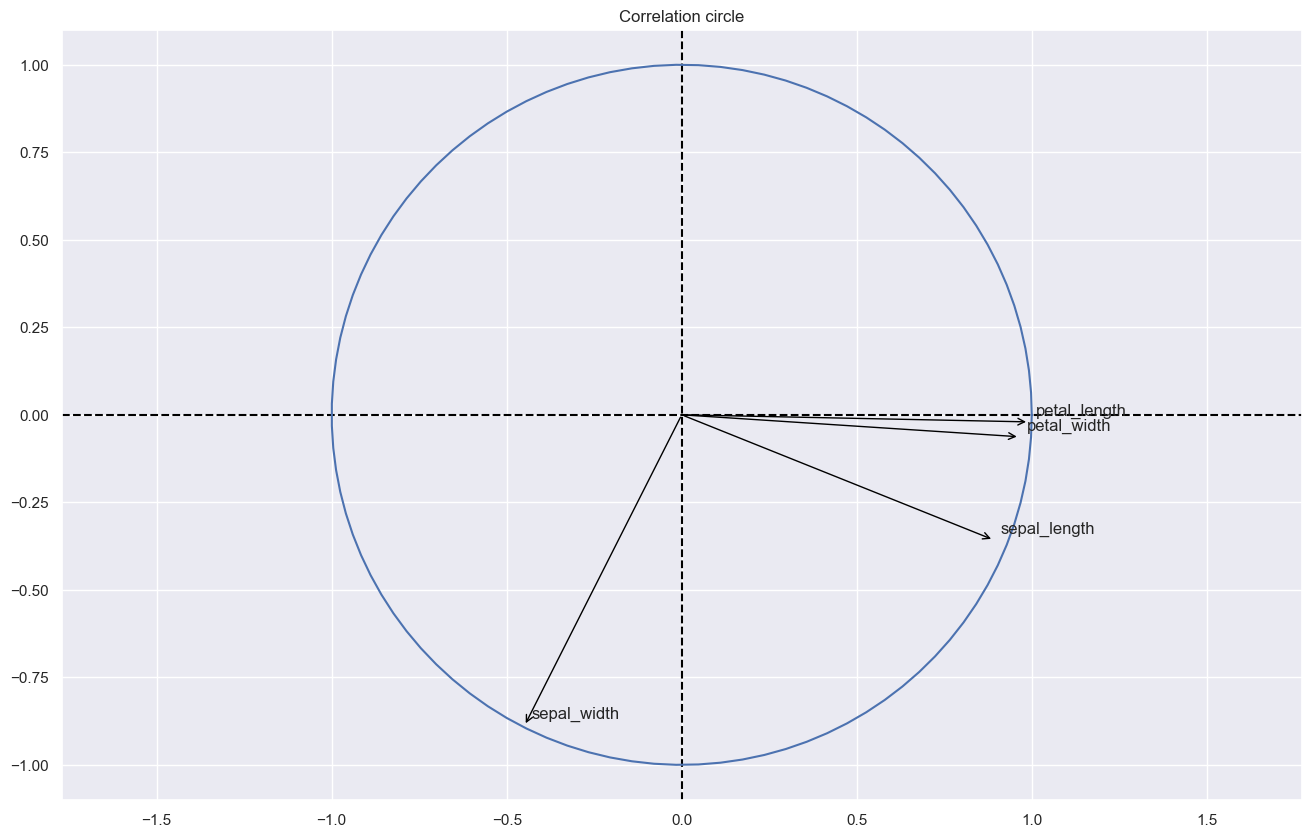

In [280]:
def plot_correlation_circle(pc1, pc2):    
    fig, ax = plt.subplots(figsize=(16, 10))

    for i in range(X_standardized.shape[1]):  # Iterate over the number of columns in X_standardized
        x = np.corrcoef(pc1, X_standardized.iloc[:, i])[0, 1]  # Access columns using iloc
        y = np.corrcoef(pc2, X_standardized.iloc[:, i])[0, 1]  # Access columns using iloc
        ax.annotate("", xy=(x, y), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color="black"))  # Set arrow color to black
        ax.annotate(X_standardized.columns[i], (x + 0.02, y + 0.02), size=12)

    ax.set_title('Correlation circle')
    ax.axhline(y=0, color="black", linestyle="--")
    ax.axvline(x=0, color="black", linestyle="--")
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()

plot_correlation_circle(pc1, pc2)


## PCA (with scikit learn)

In [304]:
X = df.drop(['species'],axis=1)
y = df.species

In [305]:
scaler = MinMaxScaler()
X_sc=scaler.fit_transform(X)

In [306]:
from sklearn.decomposition import PCA
 
pca = PCA() 
X_pca = pca.fit_transform(X_sc)


### Variance

In [307]:
pca.get_covariance()

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [308]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

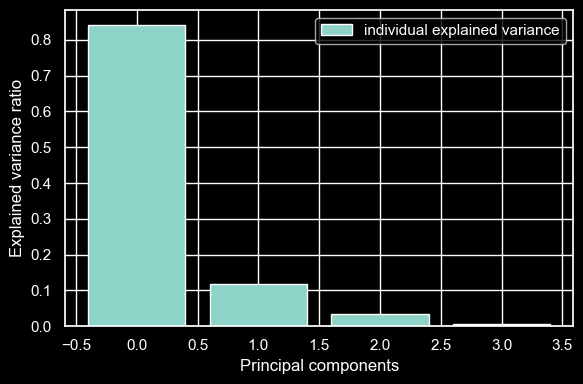

In [309]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

* Two principle components which contain the majority of the statistical variance in the original data.
* So, 2 Principal components can be chosen

In [310]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(X_sc)

In [311]:
print(pca.components_)

[[ 0.4252893  -0.14612219  0.61610511  0.64667752]
 [ 0.42100611  0.90470509 -0.06432645 -0.01116485]]


In [312]:
print(pca.explained_variance_ratio_)
print("Sum of Variance:",sum(pca.explained_variance_ratio_))

[0.84141901 0.11732474]
Sum of Variance: 0.9587437487644828


* 84% of the variance was captured in the first dimension
* 11% of the variance was captured by the second dimension

In [313]:
pv1 = pca.components_[0] 
pv2 = pca.components_[1] 

### Principal Vectors

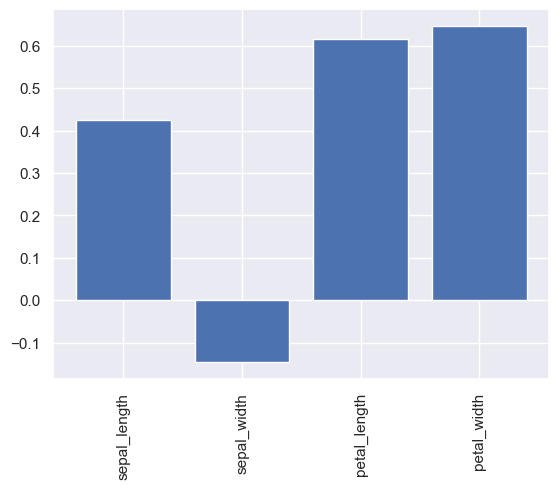

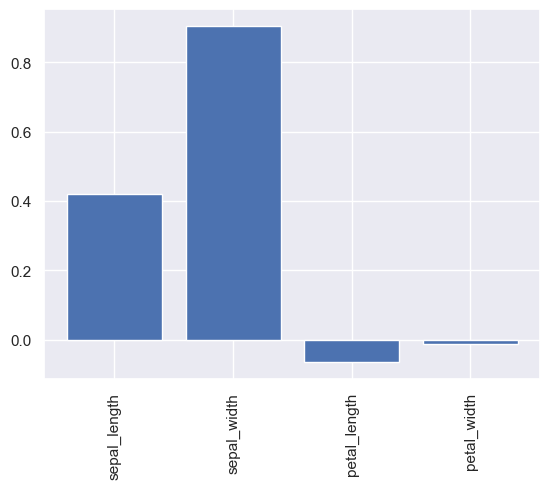

In [314]:
plt.bar(np.arange(4), pv1)
plt.xticks(np.arange(4), X.columns, rotation='vertical')
plt.show()

plt.bar(np.arange(4), pv2)
plt.xticks(np.arange(4), X.columns, rotation='vertical')
plt.show()

* The first principal vector is capturing variation in petal length,petal width, sepal length. 
* The second principal vector is capturing variation in sepal length and width.

### Verify orthogonality

In [315]:
np.abs(np.dot(pv1, pv2) < 1e-15)

True

## Visualisation

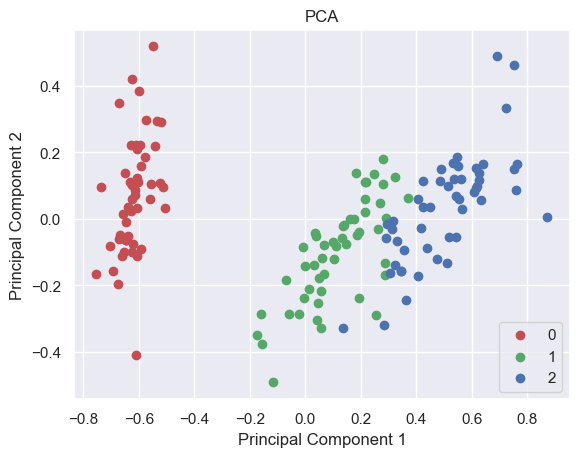

In [316]:
colors = cycle('rgb')
target_ids = range(len(df['species']))

plt.figure()
for i, c, label in zip(target_ids, colors, df['species'].unique()):
    plt.scatter(X_new[df['species'] == label, 0], X_new[df['species'] == label, 1], c=c, label=label)
plt.legend()
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Train-Test Splitting

In [317]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [318]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score with PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score with PCA",knn_pca.score(X_test_new,y_test),"%")

Train score with PCA 0.9809523809523809 %
Test score with PCA 0.9111111111111111 %


In [319]:
y_pred = knn_pca.predict(X_test_new)

In [320]:
y_pred

array([1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0,
       1], dtype=int64)

### Evaluation

In [322]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  2, 13]], dtype=int64)

C:\Users\shromana\AppData\Local\Temp\ipykernel_10628\2587645589.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


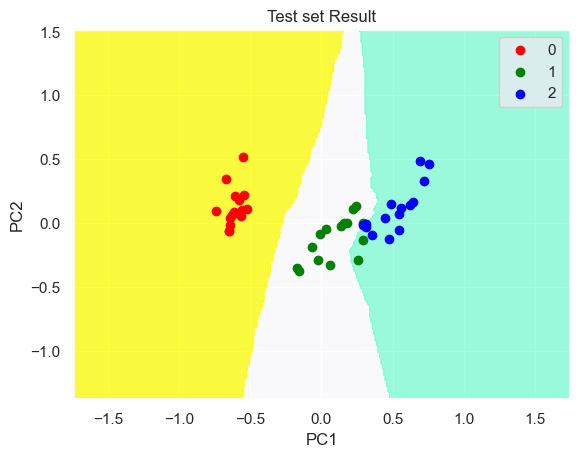

In [324]:
# Visualising the Test set results through scatter plot

 
X_set, y_set = X_test_new, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, knn_pca.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
# title for scatter plot
plt.title('Test set Result') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

## Advantages of Principal Component Analysis

1. Principal Component Analysis is a popular technique used for dimensionality reduction
2. Principal Component Analysis can be used for data visualization.
3. Principal Component Analysis can be used for outlier detection.